# BELLAKHAL MOHAMED INDP3_AIM TP TWITTER

# Installing oauth2 and tweepy libraries + Importing tweepy and the necessary libraries

In [1]:
#pip install oauth2

In [2]:
#pip install tweepy

In [1]:
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time
import socket
import json

# Twitter API credentials

In [2]:
consumer_key = '7G81rppJaOf0HFl04FlzLzrFL'
consumer_secret = '3X4Hde08pElexWk9MgBZJlIEb1tL8G4EaAhbEFjYkydX8sUM9F'
access_token = '3817555954-g45JGTjSbFaQAGGWBh4KSmyPpGgFAIwtL2iUJl9'
access_secret = '1geJJyuVFR39SNk6OqJiGhF1qvR8wwR5HsUws4ciNwUmc'

# Real time tweet listener

In [3]:
class TweetsListener(StreamListener):

  def __init__(self, csocket):
      self.client_socket = csocket

  def on_data(self, data):
      try:
          msg = json.loads( data )
          print( msg['text'].encode('utf-8') )
          self.client_socket.send( msg['text'].encode('utf-8') )
          return True
      except BaseException as e:
          print("Error on_data: %s" % str(e))
      return True

  def on_error(self, status):
      print(status)
      return True

In [4]:
def sendData(c_socket):
  auth = OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_token, access_secret)
  runtime = 60
  twitter_stream = Stream(auth, TweetsListener(c_socket))
  twitter_stream.filter(track=['Trump'])
  time.sleep(runtime)
  twitter_stream.disconnect()


In [ ]:
if __name__ == "__main__":
  s = socket.socket()         # Create a socket object
  host = "127.0.0.1"      # Get local machine name
  port = 5555                 # Reserve a port for your service.
  s.bind((host, port))        # Bind to the port

  print("Listening on port: %s" % str(port))

  s.listen(5)                 # Now wait for client connection.
  c, addr = s.accept()        # Establish connection with client.

  print( "Received request from: " + str( addr ) )

  sendData(c)

Listening on port: 5555


# Installing PySpark

In [ ]:
#pip install pyspark

In [ ]:
#pip install findspark

# Finding PySpark path and importing it to Jupyter

In [2]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\spark-2.4.7-bin-hadoop2.7'

# Creating the Spark context

In [3]:

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc # Allow us to order things in decscending order
sc = SparkContext(appName="MyAppTW3")
sc






<SparkContext master=local[*] appName=MyAppTW3>

In [4]:
ssc = StreamingContext(sc, 10)
sqlContext = SQLContext(sc)

In [5]:
ssc.checkpoint( "C:/Users/asus/Desktop/twitterscrape")

In [6]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)

In [7]:
lines = socket_stream.window( 20 )

In [8]:
from collections import namedtuple # Each element will be assigned a field
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )


In [9]:
# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word, sets up a tuple
  .reduceByKey( lambda a, b: a + b ) # Reduces by key
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts in descendoing order by count
  .limit(10).registerTempTable("tweets") ) ) # For every ten tweets is will be egistered as a table.

In [10]:
ssc.start()


In [11]:
import time
from IPython import display # Enables us to show stuff in the notebook
import matplotlib.pyplot as plt #Visualization library
import seaborn as sns # Visualization library
# Only works for Jupyter Notebooks!
# The following code enables us to view the bar plot within a cell in the jupyter notebook
%matplotlib inline

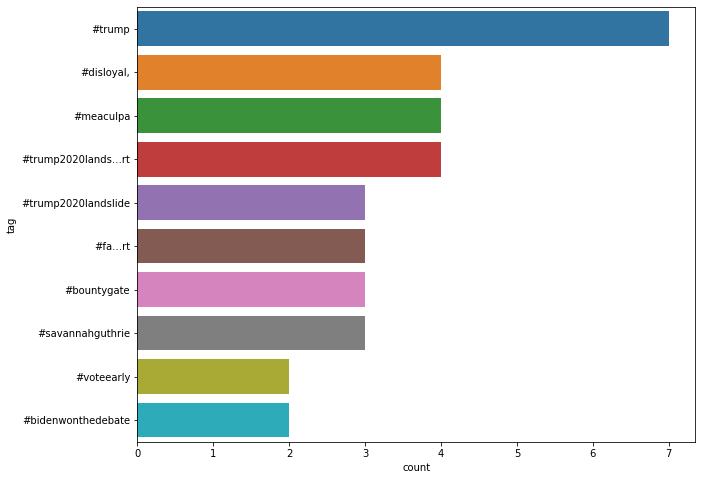

In [ ]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas() # Dataframe library
    display.clear_output(wait=True) #Clears the output, if a plot exists.
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

In [ ]:
ssc.stop()
